# DATA COLLECTION

> ### Importing Necessary Libraries

In [4]:
import bs4
import requests
from selenium import webdriver
import os
import time
import io
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By

> ### Webscraping using selenium

Creating folders named ai_images and real_images to save the images scrapped


In [2]:
folder_name_ai = 'ai_images'
if not os.path.isdir(folder_name_ai):
    os.makedirs(folder_name_ai)
folder_name_real = 'real_images'
if not os.path.isdir(folder_name_real):
    os.makedirs(folder_name_real)

Writing a function which downloads images using a url path for image and image file name

In [3]:
def download_image(url, name):
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join('./Webscraping/',name+".jpg"), 'wb') as file:
            file.write(reponse.content)

Creating a Chromedriver instance

In [ ]:
driver=webdriver.Chrome()
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
driver.get(url)
xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(1)
driver.find_element(By.XPATH,xPath).click()

Writing a function to do web scraping and downloading the required image. It skips the 25th image which is an add. Moreover,it clicks every image for better resolution.

In [7]:
def download(url,name,num_images=50):
    driver.get(url)
    for i in range(1, num_images+1):
        if i % 25 == 0:
            continue
        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageElement = driver.find_element(By.XPATH,previewImageXPath)
        previewImageURL = previewImageElement.get_attribute("src")

        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)
        driver.find_element(By.XPATH,xPath).click()

        timeStarted = time.time()
        while True:
            try:
                imageElement = driver.find_element(By.XPATH,"""//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]""")
                imageURL= imageElement.get_attribute('src')

                if imageURL != previewImageURL:
                    break
                else:
                    currentTime = time.time()
                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break
            except:
                print("No such image %s found,continuing downloading the previous one"%(i))
                break


        #Downloading image
        try:
            download_image(imageURL, name+str(i))
            if (i%10==0):print("Downloaded elements %s out of %s total. URL: %s" % (i, num_images , imageURL))
        except:
            print("Couldn't download an image %s, continuing downloading the next one"%(i))

In [ ]:
driver=webdriver.Chrome()
url = 'https://www.google.com/search?q=ai+generated+images&tbm=isch'
download(url,"AIGeneratedImages",num_images=50)

> ### Scraping Images using Pygoogle_image

Importing Necessary Libraries

In [9]:
from pygoogle_image import image as pi

Downloading the images

In [42]:
pi.download(keywords='ai generated images', limit=100, directory='./ai_images/')
pi.download(keywords='dalle2 generated images', limit=100, directory='./ai_images/')

[========================================================================] 100%
[========================================================================] 100%


In [43]:
pi.download(keywords='animals', limit=100, directory='./real_images/')
pi.download(keywords='humans', limit=100, directory='./real_images/')
pi.download(keywords='cityscape', limit=100, directory='./real_images/')


[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%


> ### Data Preprocessing

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2 as cv
import os
import PIL
import pickle
import pathlib
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add


Defining required constants for training data

In [41]:
pict_size=36
data_dir="./train/"
Type=['FAKE','REAL']
val={'FAKE':0,'REAL':1}
final={0:'FAKE',1:'REAL'}
Training_data=[]

Loading Dataset

In [ ]:
lis=[]
for categ in Type:
    Files=os.listdir(data_dir+categ+"/")
    i=1
    for file in Files:
        imgpath=os.path.join(data_dir+categ+"/",file)
        lis.append(imgpath)
        image=cv.imread(imgpath)
        img=cv.imread(str(lis[-1]))
        try:
            new_img=cv.resize(img,(pict_size,pict_size))
            new_img=new_img/255
            Training_data.append([new_img,val[categ]])
        except:
            print("Not able to preprocess")
        i=i+1

Example Image

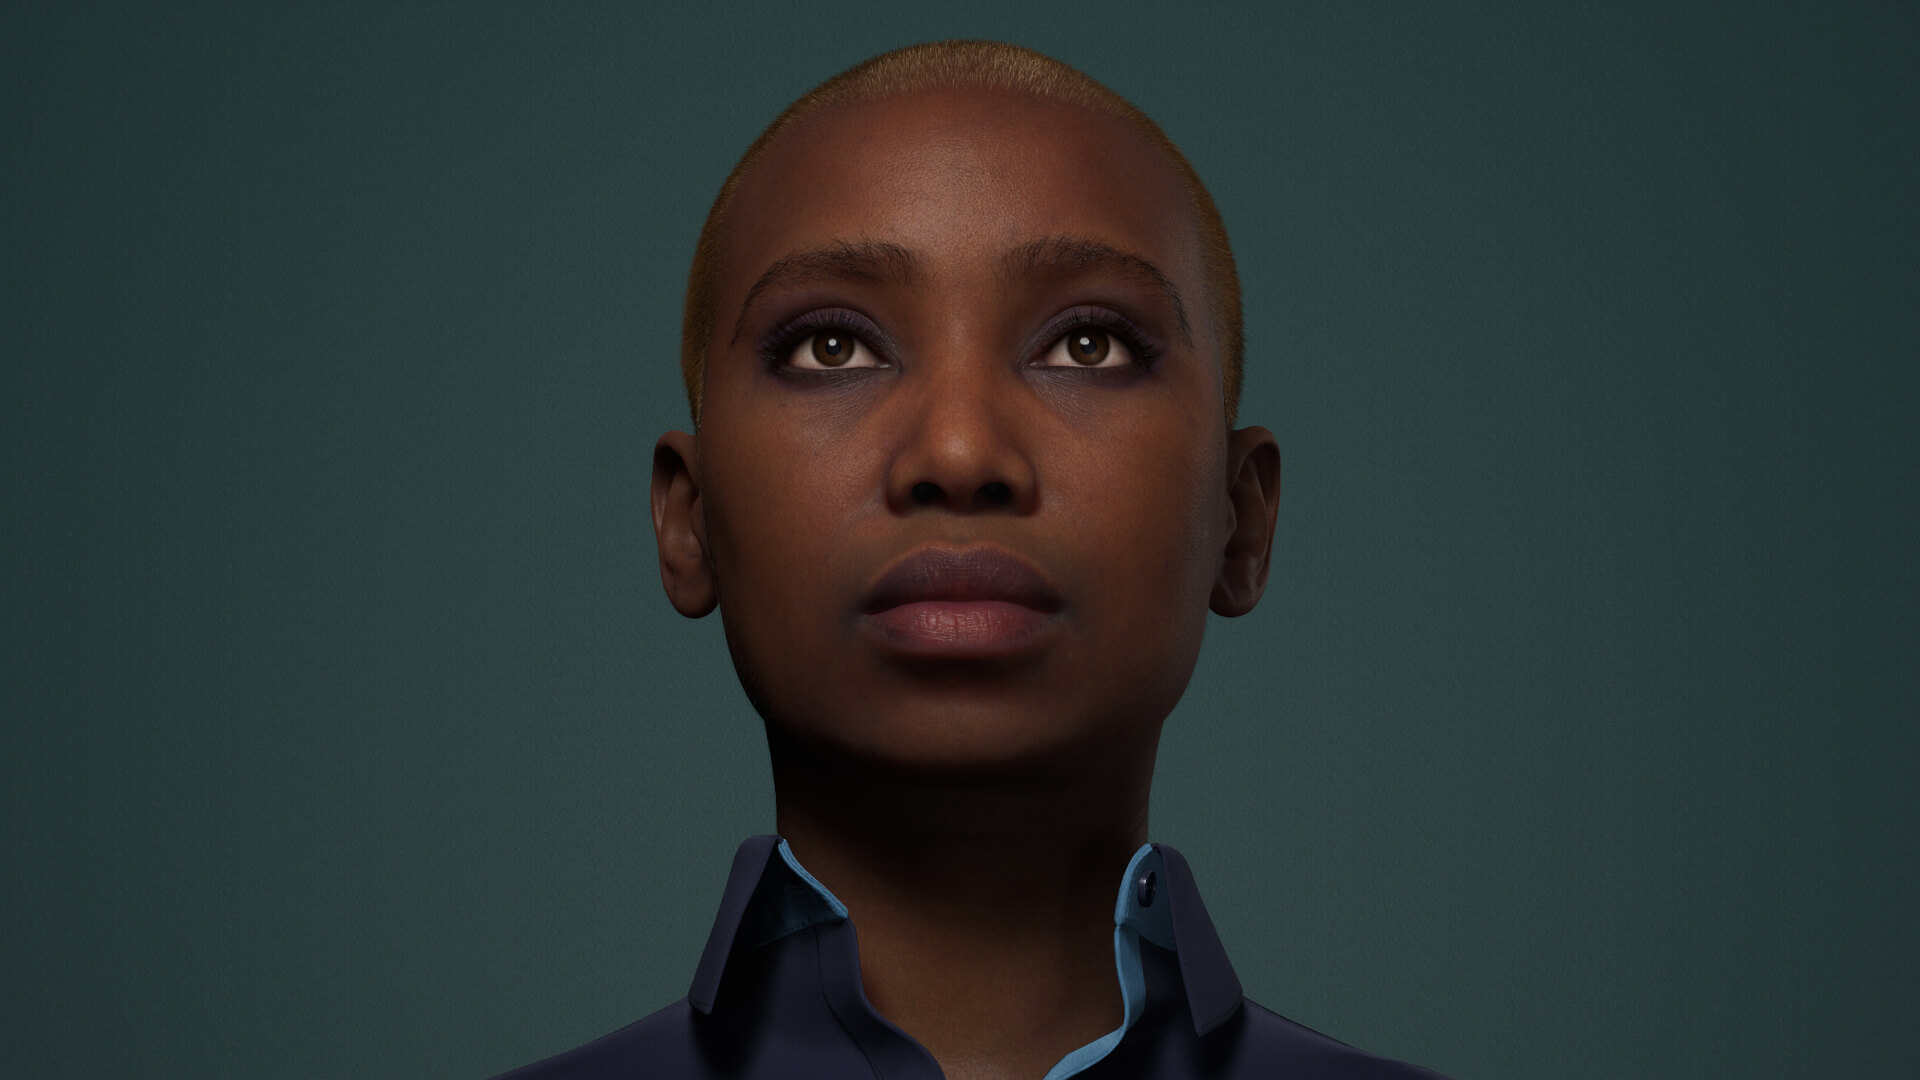

In [8]:
PIL.Image.open(str(lis[-1]))

Dividing dataset into training and testing data

In [10]:
import random
random.shuffle(Training_data)

In [14]:
len(Training_data)

100499

In [49]:
X_Train=[]
Y_Train=[]

In [50]:
for i in range(0,len(Training_data)):
    X_Train.append(Training_data[i][0])
    Y_Train.append(Training_data[i][1])

In [51]:
len(X_Train)

100499

In [52]:
len(Y_Train)

100499

In [53]:
X_Train=np.array(X_Train)
Y_Train=np.array(Y_Train)

In [54]:
unique_elements, counts_elements = np.unique(Y_Train, return_counts=True)
print("Frequency of unique values of the Train Set:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Train Set:
[[    0     1]
 [50208 50291]]


Saving the dataframe as a pickle file

In [41]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X_Train,pickle_out)
pickle_out.close()

pickle_out=open("Y.pickle","wb")
pickle.dump(Y_Train,pickle_out)
pickle_out.close()